In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import numpy as np
import mdtraj as md
import nglview as ngl
import sys
sys.path.append("/home/x_mallu/mln_lf/Transcriptionfactor_unbinding/")
from Analysis_Scripts import plotting_gmx
from Analysis_Scripts import analysis_of_CVs
from Analysis_Scripts import analysis_of_CVs_NMR

In this script you load all the results for CVs into a jupyter-notebooks and compare how they behave in different types of simulations. Both, the type of bias, and the sequence cahnge.

In [2]:
folder_metaD_OSymL_cmap_alpha = "/home/x_mallu/mln_lf/EXP-22-BV4083/data_OSymL/DNA-protein_protein-protein_alphaRMSD/06-prod/"
folder_metaD_NOD_cmap_alpha = "/home/x_mallu/mln_lf/EXP-22-BV4083/data_NOD/DNA-protein_protein-protein_alphaRMSD/06-prod/"
folder="/home/x_mallu/mln_lf/Transcriptionfactor_unbinding/"
topo = folder_metaD_OSymL_cmap_alpha + "1/1efa_noTet_99sbws_proc_mod_resID.pdb"
folder_unbiases = "/home/x_mallu/mln_lf/EXP-21-BV4028_contains_unbiased/06-unbiased_SymL/"
folder_NMR_OSymL = "/home/x_mallu/mln_lf/EXP-23-BV4094/data_SymL/06-prod/"
folder_NMR_NOD = "/home/x_mallu/mln_lf/EXP-23-BV4094/data_NOD/06-prod/"

folder_1osl = "/home/x_mallu/mln_lf/1OSL_CV_analsyis/"

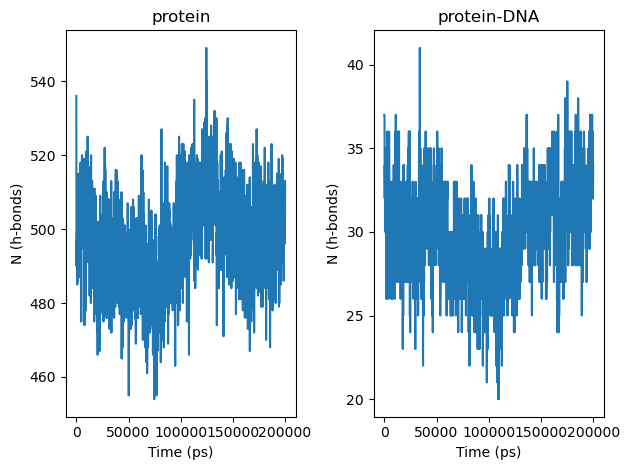

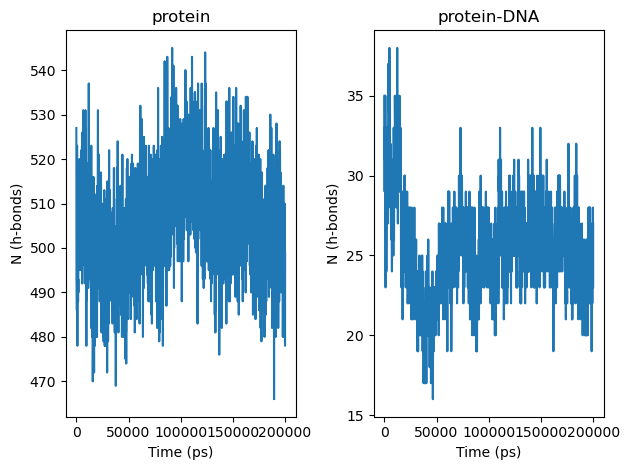

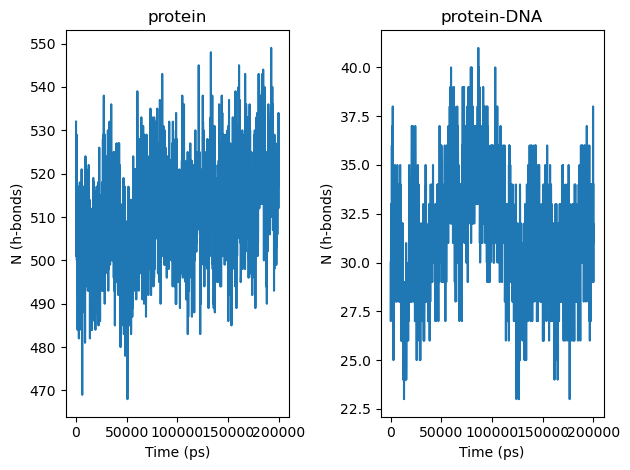

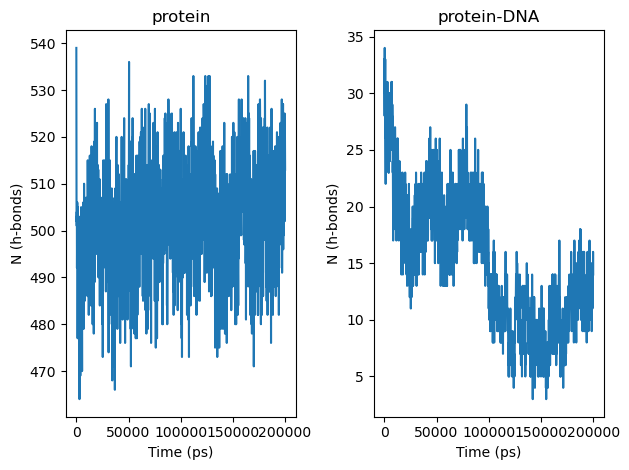

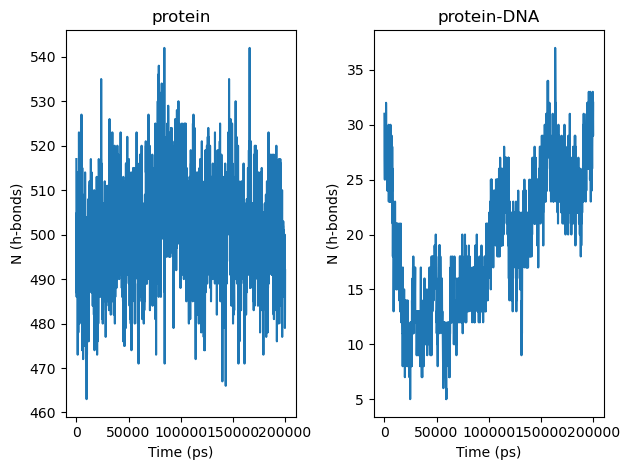

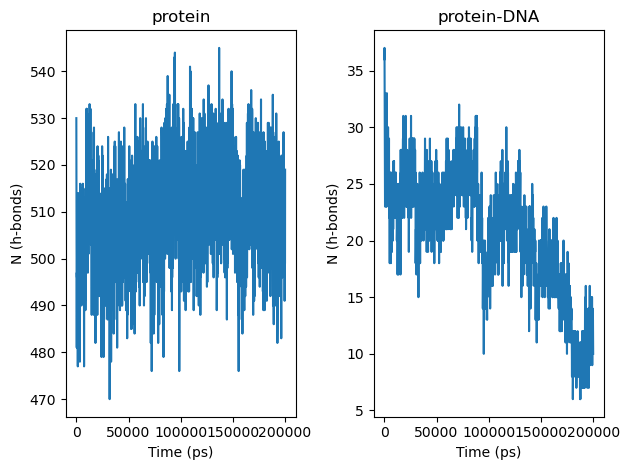

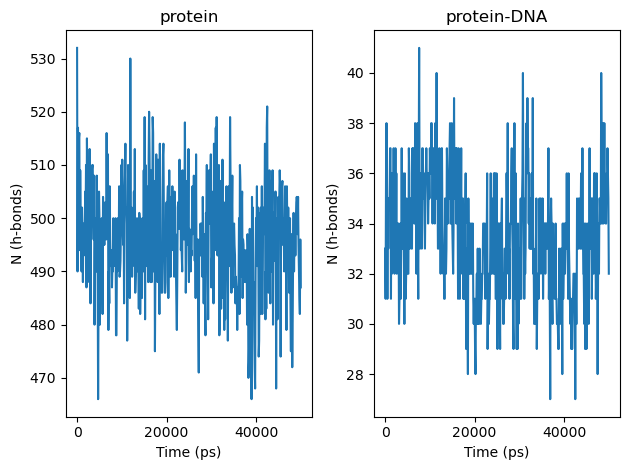

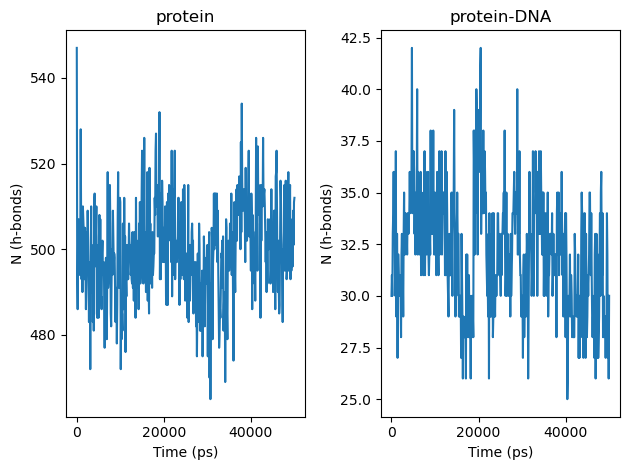

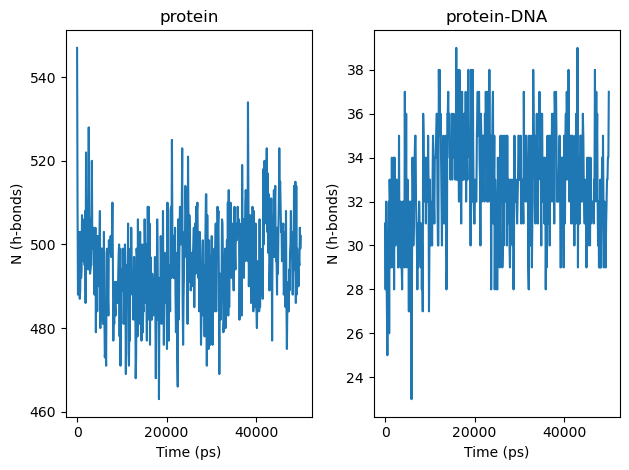

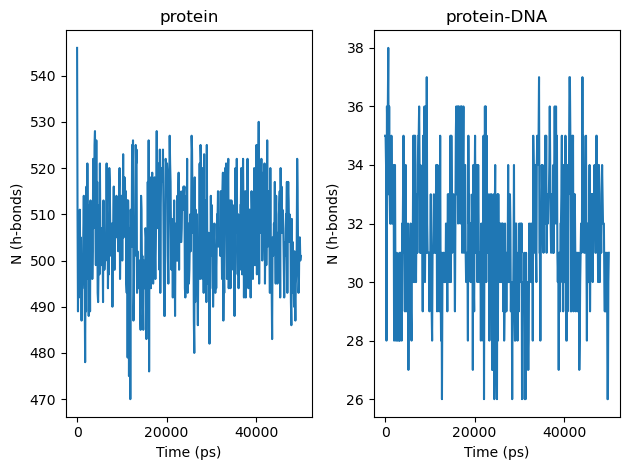

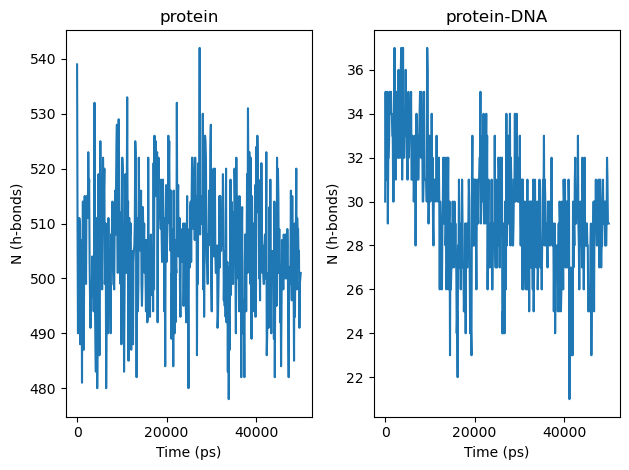

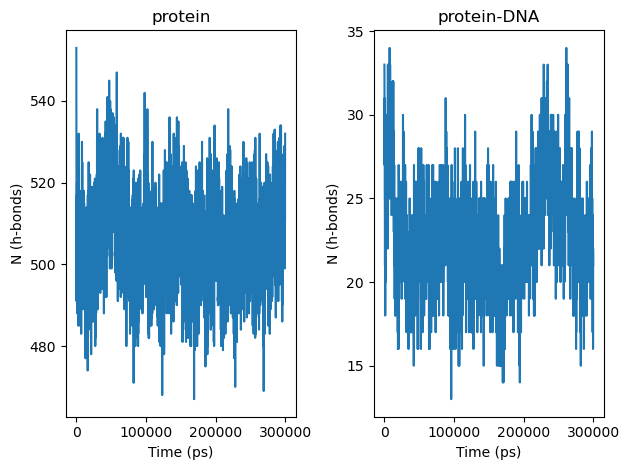

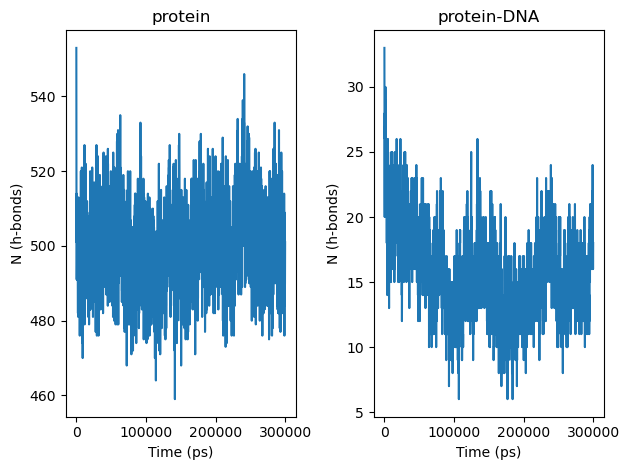

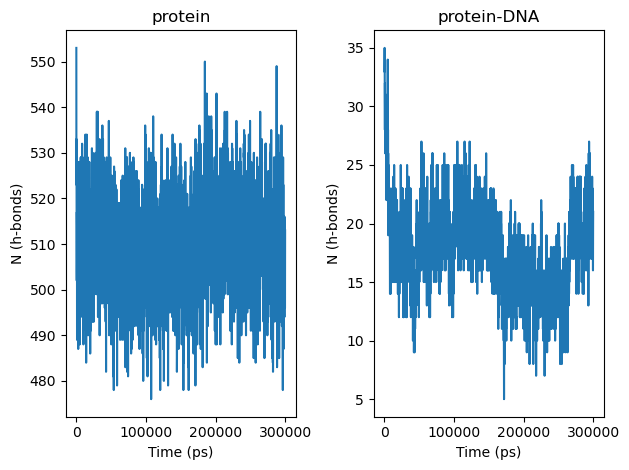

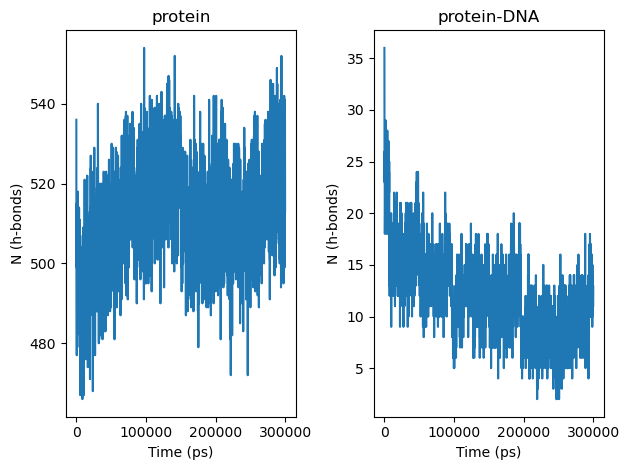

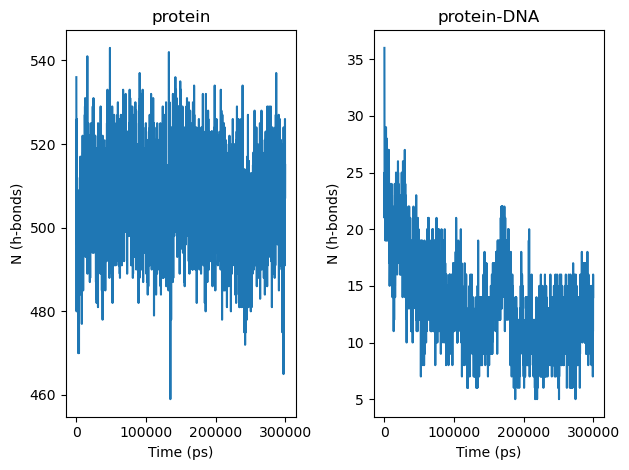

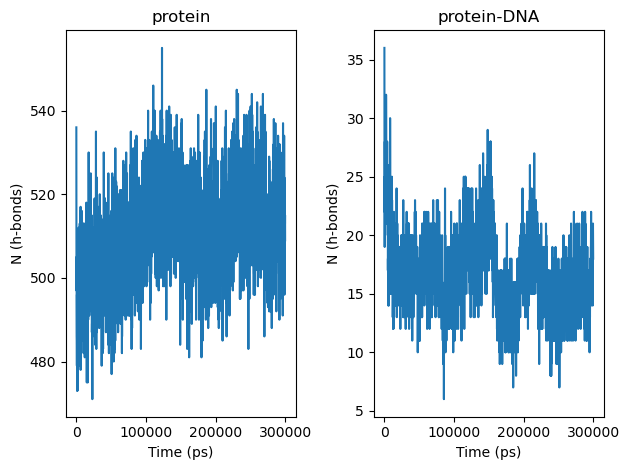

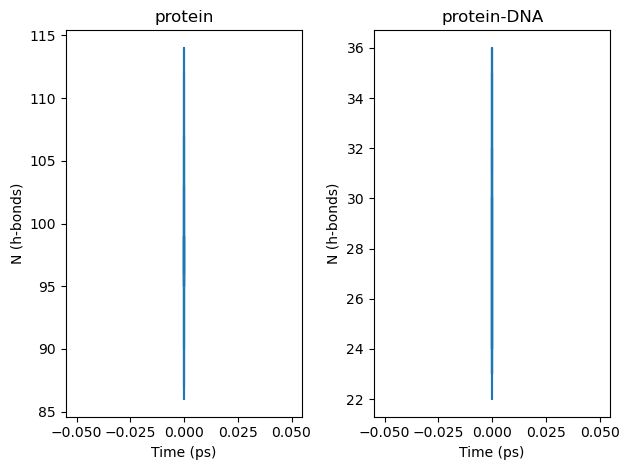

In [12]:
# read in all the data from PLUMED CV analysis for plotting
CVs_metaD_OSymL_cmap_alpha = analysis_of_CVs.CVs_replicas(folder_metaD_OSymL_cmap_alpha,3)
CVs_metaD_OSymL_cmap_alpha["Simulation"]= ["MetaD, OSymL" for x in range(len(CVs_metaD_OSymL_cmap_alpha))]
CVs_metaD_NOD_cmap_alpha = analysis_of_CVs.CVs_replicas(folder_metaD_NOD_cmap_alpha,3)
CVs_metaD_NOD_cmap_alpha["Simulation"]= ["MetaD, NOD" for x in range(len(CVs_metaD_NOD_cmap_alpha))]
CVs_unbiased = analysis_of_CVs.CVs_replicas(folder_unbiases,5)
CVs_unbiased["Simulation"]= ["Unbiased, OSymL" for x in range(len(CVs_unbiased))]
NMR_CVs = analysis_of_CVs_NMR.CVs_replicas(folder_NMR_OSymL, 3, path_ana = "analysis/")
NMR_CVs["Simulation"]= ["NMR, OSymL" for x in range(len(NMR_CVs))]

NMR_CVs_NOD = analysis_of_CVs_NMR.CVs_replicas(folder_NMR_OSymL, 3, path_ana = "analysis/")
NMR_CVs_NOD["Simulation"]= ["NMR, NOD" for x in range(len(NMR_CVs))]

osl_CVs = analysis_of_CVs_NMR.CVs_replicas(folder_1osl, 1)
osl_CVs["Simulation"] = ["NMR Structure" for x in range(len(osl_CVs))]
CVs_all  = pd.concat([CVs_unbiased, CVs_metaD_OSymL_cmap_alpha, CVs_metaD_NOD_cmap_alpha, NMR_CVs_NOD,osl_CVs])

# read in the data from GROMACS h-bond analysis
hbonds_metaD_OSymL_cmap_alpha = analysis_of_CVs_NMR.plot_hbonds(folder_metaD_OSymL_cmap_alpha,3)
hbonds_metaD_OSymL_cmap_alpha["Simulation"]= ["MetaD, OSymL" for x in range(len(hbonds_metaD_OSymL_cmap_alpha))]
hbonds_metaD_NOD_cmap_alpha = analysis_of_CVs_NMR.plot_hbonds(folder_metaD_NOD_cmap_alpha,3)
hbonds_metaD_NOD_cmap_alpha["Simulation"]= ["MetaD, NOD" for x in range(len(hbonds_metaD_NOD_cmap_alpha))]
hbonds_ub = analysis_of_CVs_NMR.plot_hbonds(folder_unbiases,5)
hbonds_ub["Simulation"]= ["Unbiased, OSymL" for x in range(len(hbonds_ub))]
NMR_hbonds = analysis_of_CVs_NMR.plot_hbonds(folder_NMR_OSymL, 3, path_ana = "analysis/")
NMR_hbonds["Simulation"]= ["NMR, OSymL" for x in range(len(NMR_hbonds))]


NMR_hbonds_NOD = analysis_of_CVs_NMR.plot_hbonds(folder_NMR_NOD, 3, path_ana = "analysis/")
NMR_hbonds_NOD["Simulation"]= ["NMR, NOD" for x in range(len(NMR_hbonds_NOD))]

hbonds_osl = analysis_of_CVs_NMR.plot_hbonds(folder_1osl, 1)
hbonds_osl["Simulation"]= ["NMR Structure" for x in range(len(hbonds_osl))]
hbonds_all = pd.concat([hbonds_ub, hbonds_metaD_OSymL_cmap_alpha, hbonds_metaD_NOD_cmap_alpha, NMR_hbonds_NOD,hbonds_osl])

In [13]:
CVs_all["Protein-DNA H-Bonds"] = hbonds_all["Protein-DNA H-Bonds"]

In [14]:
np.unique(CVs_all["Simulation"])

array(['MetaD, NOD', 'MetaD, OSymL', 'NMR Structure', 'NMR, NOD',
       'Unbiased, OSymL'], dtype=object)

In [15]:
CVs_all["Formed Helices"] = CVs_all["Formed Helices"]/4
CVs_all["Contacts"] = CVs_all["Contacts"]/CVs_all["Contacts"].max()
CVs_all["Specific Contacts"] = CVs_all["Specific Contacts"]/CVs_all["Specific Contacts"].max()
CVs_all["Hinge Helix Contacts"] = CVs_all["Hinge Helix Contacts"]/CVs_all["Hinge Helix Contacts"].max()
CVs_all["Protein-DNA H-Bonds"] = CVs_all["Protein-DNA H-Bonds"]/CVs_all["Protein-DNA H-Bonds"].max()

CVs_all["DNA Bent (deg)"] = CVs_all["DNA Bent (deg)"]/CVs_all["DNA Bent (deg)"].max()
CVs_all["Hinge DNA\nDistance (nm)"] = CVs_all["Hinge DNA\nDistance (nm)"]/CVs_all["Hinge DNA\nDistance (nm)"].max()

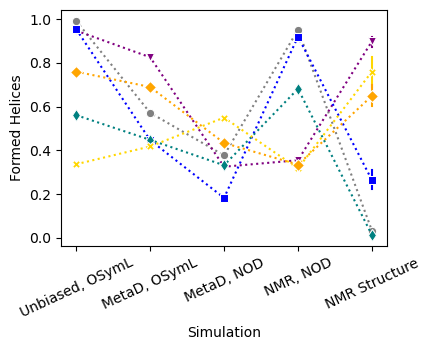

In [16]:
fig, axs = plt.subplots(figsize=(2.2*2,1.8*2))
sns.lineplot(data=CVs_all, y="Formed Helices" ,x="Simulation", color="grey", marker='o', linestyle=':', err_style='bars')
sns.lineplot(data=CVs_all, y="Specific Contacts" ,x="Simulation", color="purple", marker='v', linestyle=':', err_style='bars')
sns.lineplot(data=CVs_all, y="Hinge Helix Contacts" ,x="Simulation", color="blue", marker='s', linestyle=':', err_style='bars')
sns.lineplot(data=CVs_all, y="DNA Bent (deg)" ,x="Simulation", color="teal", marker='d', linestyle=':', err_style='bars')
sns.lineplot(data=CVs_all, y="Hinge DNA\nDistance (nm)" ,x="Simulation", color="gold", marker='X', linestyle=':', err_style='bars')
sns.lineplot(data=CVs_all, y="Protein-DNA H-Bonds" ,x="Simulation", color="orange", marker='D', linestyle=':', err_style='bars')
plt.xticks(rotation=25)
plt.tight_layout()
plt.savefig(folder+"Figures/CompareSims/lines.pdf", dpi=300)
plt.show()

In [17]:
Unbiased_Mean_2 = (CVs_all[CVs_all["Simulation"]=="Unbiased, OSymL"].mean())**2

In [18]:
Unbiased_Mean_2["Formed Helices"]

0.9838141981782346

/home/x_mallu/.conda/envs/myownenv/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


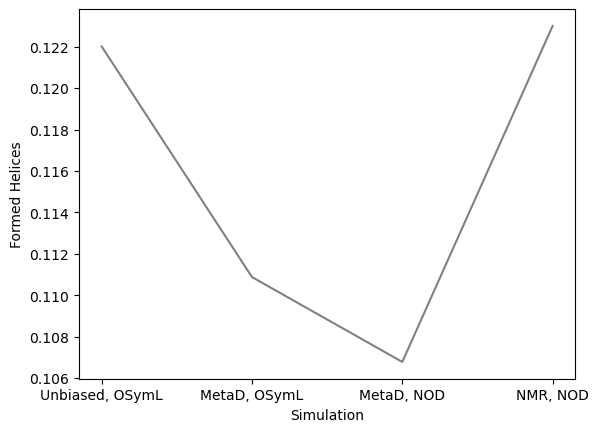

In [19]:
CVs_all["Formed Helices"] = np.sqrt( (CVs_all["Formed Helices"])**2-Unbiased_Mean_2["Formed Helices"] )
sns.lineplot(data=CVs_all, y="Formed Helices" ,x="Simulation", color="grey")
plt.show()